## Demo Segment Clustering

In [2]:
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


### Generate mock data

In [3]:
# Generate 300,000 data points, with 150 dimensions, distributed into 200 clusters.
data, clusters = make_blobs(300000, 150, centers=200)
data.shape

(300000, 150)

Data shape after dimensional reduction: (300000, 2)


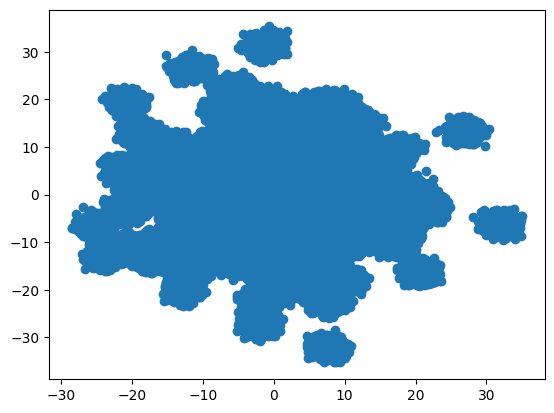

In [4]:
# Visualization (optional). First the data is reduced to 2D dimension to be able to visualized by scatter plot
pca = PCA(2)
data_2d = pca.fit_transform(data)
print(f"Data shape after dimensional reduction: {data_2d.shape}")
plt.scatter(data_2d[:, 0], data_2d[:, 1])

### Stage 1 clustering
In this stage we use a cheap and memory-efficient clustering method to "compress" the data into a smaller subset, which is used as input for subsequent clustering process

In [5]:
initial_clusterer = MiniBatchKMeans(n_clusters=3000, batch_size=2048, max_iter=10, verbose=0, random_state=0)
labels = initial_clusterer.fit_predict(data)
# We use the centroids of the clusters as out compressed version of the initial data
compressed_data = initial_clusterer.cluster_centers_
print(f"Compressed data shape: {compressed_data.shape}")

/mnt/exthdd/minhpham/vunx/demo_ddms_clustering/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Compressed data shape: (3000, 150)


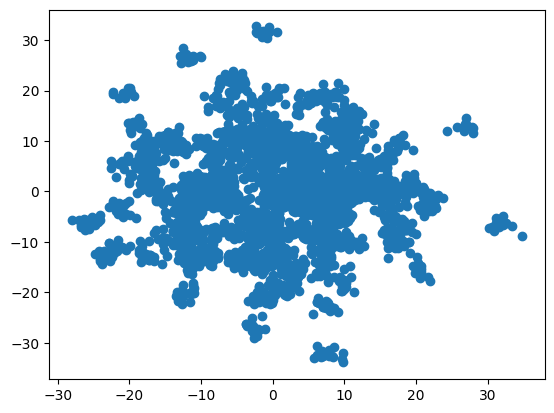

In [6]:
# Visualization (optional)
u_label = np.unique(labels)
centers = []
for i in u_label:
    labeled_data = data_2d[labels==i]
    center = labeled_data.mean(axis=0)
    centers.append(center)
# print(centers)
centers = np.array(centers)
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

### Stage 2 clustering

In [7]:
# Optimizing distance threshold for AgglomerativeClustering using silhouette score (range: -1 to 1)
thresholds = []
scores = []
n_clusters = []
for threshold in range(20, 500, 20):
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
    labels = model.fit_predict(compressed_data)
    if model.n_clusters_ == 1:
        break
    thresholds.append(threshold)
    n_clusters.append(model.n_clusters_)
    scores.append(silhouette_score(compressed_data, labels))

In [8]:
optimization_results = pd.DataFrame(data=zip(thresholds, n_clusters, scores), columns=["threshold", "n_cluster", "silhouette_score"])
optimization_results

,threshold,n_cluster,silhouette_score
0,20,287,0.499424
1,40,200,0.819374
2,60,200,0.819374
3,80,200,0.819374
4,100,200,0.819374
5,120,200,0.819374
6,140,200,0.819374
7,160,200,0.819374
8,180,200,0.819374
9,200,200,0.819374


In [9]:
# Select threshold = 100 based on optimization result
final_clusterer = AgglomerativeClustering(n_clusters=None, distance_threshold=100)
final_labels = final_clusterer.fit_predict(compressed_data)
print(f"Final number of clusters: {final_clusterer.n_clusters_}")

Final number of clusters: 200
